# Изучение рынка гостиничного бизнеса
## Работа с регулярными выражениями, обработка данных и визуализация

## Установим необходимые нам библиотеки

* для сбора данных

**Библиотека requests** позволяет отправлять HTTP запросы к серверам и получать ответы, а также управлять различными параметрами запроса, например, заголовками, параметрами запроса и телом запроса.  

**Библиотека BeautifulSoup** - для парсинга (анализа) HTML-кода. Она нужна для извлечения нужной информации из веб-страниц, таких как заголовки, тексты, ссылки, таблицы. Используя BeautifulSoup, можно извлекать информацию из HTML-кода, преобразовывать его в удобный формат и сохранять в нужном виде. 

In [1]:
import requests
from bs4 import BeautifulSoup
from time import sleep

* для обработки данных

**библиотека Pandas** - инструменты для работы с табличными данными. 

In [15]:
import pandas as pd

* для визуализации

**библиотеки matplotlib** – неинтерактивные графики   
**plotly.graph_objects** – интерактивные графики 

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

!pip install plotly
import plotly
import plotly.graph_objects as go

## Сбор данных

Мы используем сайт "Островок.ру", где ищем отели в Лондоне на одну ночь в период с 10 по 11 июля на 2 взрослых. Никаких дополнительных характеристик на сайте выставлено не было. Итак, загрузим нашу ссылку в переменную `url`, в переменную `page` сохраним все наши запросы по странице.

In [17]:
url = 'https://ostrovok.ru/hotel/united_kingdom/london/?q=2114&dates=10.07.2023-11.07.2023&guests=2&center=51.50732x-0.1276474&page=1&price=one&sid=c960e132-f2f3-4486-9631-845864b37595'
page = requests.get(url) 

`page = requests.get(url)`  - **HTTP-запрос на URL-адрес**, указанный в переменной url, используя библиотеку requests. page содержит **ответ сервера, который включает в себя HTTP-статус код, заголовки и тело ответа**.

In [18]:
soup = BeautifulSoup (page.text)

используется для **создания объекта BeautifulSoup из текстового содержимого веб-страницы**.soup содержит древовидное представление разметки веб-страницы. В дальнейшем его можно использовать для парсинга и обработки данных веб-страницы.

Воспользуемся функцией `find_all`. В будущем мы сделаем это еще не один раз, однако для начала узнаем количество страниц по нашему поиску. 

In [19]:
soup.find_all('a', attrs = {'class': 'zen-pagination-item-value'})[-1]

<a class="zen-pagination-item-value" href="/hotel/united_kingdom/london/?page=531">
                                531
                            </a>

поиск последнего элемента со ссылкой на страницу веб-страницы. Первый аргумент soup.find_all('a') указывает на то, что нам нужны **теги a**, которые могут содержать ссылки. **Атрибут attrs** - это словарь со значениями атрибутов, которые мы ищем внутри тегов.  
тег(а, div), атрибут(class/..)

In [20]:
last = int(soup.find_all('a', attrs = {'class': 'zen-pagination-item-value'})[-1].get('href').split('page=')[1])
last

531

Метод get('href') возвращает значение атрибута href у выбранной ссылки. он объединяет эту ссылку со строкой 'https://ostrovok.ru' и сохраняет результат в переменную url0.

Итак, количество страниц равняется 531. Теперь можно написать цикл, который будет ходить по всем существующим страницам и собирать для нас данные.

In [21]:
urls = []
for i in range(1, last + 1):
    urls.append(f'https://ostrovok.ru/hotel/united_kingdom/london/?q=2114&dates=10.07.2023-11.07.2023&guests=2&center=51.50732x-0.1276474&page={1}&price=one&sid=c960e132-f2f3-4486-9631-845864b37595')

Теперь будем использовать переменную `soup0` и `find_all` для поиска нужных нам характеристик: названия отеля, стоимости номера за ночь и любых других, которые могут показаться интересными и информативными.

In [22]:
url0 = 'https://ostrovok.ru' + soup.find_all('a', attrs = {'class': 'zen-hotelcard-name-link'})[0].get('href')
page0 = requests.get(url0)
soup0 = BeautifulSoup(page0.text)

Выведем название первого отеля.

In [23]:
title = soup0.find_all('h1')[0].text
title

'Отель Apex Temple Court Hotel 4*'

В ходе работы были выведены следующие потенциальные перменные: название отеля, адрес, номер телефона, ближайшая достопримечательность, рейтинг по оценкам проживающих, расстояние в метрах до центра, расстояние в метрах до метро и название станции, цена за номер за ночь, наличие кондиционера, завтрака, фитнес-зала, wi-fi, парковки, а также возможность заселиться с домашними животными и разнообразие языков, на которых говорит персонал. Была также выведена некоторая текстовая информация: мы подумали, что потом можно будет искать вхождения в текст по некоторым характеристикам, например "обмен валют". 

In [24]:
tel = soup0.find_all('a', attrs = {'class' : 'zen-headermenu-call'})[0].get('href')
tel

'tel:+74992156525'

Номер телефона мы все же решили не использовать, так он для нас не несет ценной информации.

In [25]:
region= soup0.find_all('a', attrs = {'class' : 'zen-roomspage-navigations-link'})[0].text.strip()
regiontel = soup0.find_all('a', attrs = {'class' : 'zen-headermenu-call'})[0].get('href')
region

'Тейт Модерн'

Переменная, которую мы изначально назвали `region`, в итоге оказалась названием ближайшей достопримечательности, что и было исправлено в будущем.

Переменная, которая выводит рейтинг по отзывам посетителей.

In [26]:
reviews_rating = soup0.find_all('p', attrs = {'class' : 'zen-roomspage-reviews-rating'})[0].text.strip()[-5:]
reviews_rating

'10,00'

Переменная, которая выводит расстояние до центра в метрах.

In [27]:
distance_centre = int(soup0.find_all('span', attrs = {'class' : 'zen-roomspage-title-distance-value'})[0].text.strip().replace('м',''))
distance_centre

1494

Переменная, которая выводит расстояние до метро в метрах, следующая выводит название станции.

In [28]:
transport_distance = int(soup0.find_all('span', attrs = {'class' : 'zen-roomspage-distance-value'})[0].text.replace('м',''))
print(transport_distance) 

transport_name = soup0.find_all('span', attrs = {'class' : 'zen-roomspage-distance-metro'})[0].text
print(transport_name)

408
метро Блэкфрайарз


Переменная, которая выводит цену за ночевку.

In [29]:
price = int(soup0.find_all('span', attrs = {'class' : 'zen-roomspage-calltoaction-roomtypes-price-value bold'})[0].text.replace('руб.', ''))
price

31881

Переменная, которая выводит наличие кондиционера.

In [30]:
condey = soup0.find_all('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_common_info'})[0].text
condey

'Кондиционер'

Переменная, которая выводит информацию о питании.

In [31]:
breakfest = soup0.find_all('div', attrs = {'class' : 'zen-roomspage-detailed-amenities-list-item-text'})[11].text.strip().replace('  ','').replace('\n\n','')
breakfest

'Бар, Бесплатный чай/кофе, Завтрак, Завтрак в номер, Кафе, Ресторан, Кухня, Микроволновая печь, Кофемашина, Бутилированная вода (за дополнительную плату)'

Переменная, которая выводит информацию о наличии фитнес-центра.

In [32]:
fitness = soup0.find_all('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_fitness'})[0].text
fitness 

'Фитнес-центр'

Переменная, которая выводит информацию о наличии бесплатного wi-fi.

In [33]:
wifi = soup0.find_all('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_internet'})[0].text
wifi 

'Бесплатный Wi-Fi'

Переменная, которая выводит информацию о языках, которыми владеет персонал.

In [34]:
service_languages = soup0.find_all('div', attrs = {'class' : 'zen-roomspage-detailed-amenities-list-item-text'})[10].text.strip().replace('  ','').replace('\n\n','')
service_languages

'на испанском, на немецком, на русском, на английском, на итальянском, на французском, на корейском, Мультиязычный персонал, на польском'

Переменная, которая выводит информацию о наличии парковки.

In [35]:
parking = soup0.find_all('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_parking'})[0].text
parking

'Парковка'

Переменная, которая выводит информацию о возможности переночевать с питомцами.

In [36]:
pets = soup0.find_all('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_pets'})[0].text
pets

'Размещение с домашними животными не допускается'

Переменная, которая выводит адрес отеля.

In [37]:
address = soup0.find_all('div', attrs = {'class' : 'zen-roomspage-address'})[0].text
address

'1-2 Serjeants Inn Fleet Street, Лондон'

Переменная, которая выводит общую информацию об отеле.

In [38]:
hotel_describe = soup0.find_all('p', attrs = {'class' : 'zen-roomspage-about-item-text'})[1].text
hotel_describe # здесь тоже можно будет искать "вхождения в текст"

'В качестве развлечений гостям предлагается посещение фитнес-клуба, где есть тренажеры на все группы мышц. Любознательным гостям рекомендуется заглянуть в экскурсионное бюро, где можно узнать о самых интересных прогулках по городу. Персонал отеля владеет несколькими иностранными языками и с удовольствием ответит на все ваши вопросы. Также к вашим услугам предлагается пункт обмена валюты и сервис по бронированию билетов.'

Переменная, которая выводит общую информацию об удобствах в отеле.

In [39]:
convinients = soup0.find_all('div', attrs={'class': 'zen-roomspage-detailed-amenities-list-item-text'})[0].text.strip().replace('  ', '').replace('\n\n', '')\
              + soup0.find_all('div', attrs={'class': 'zen-roomspage-detailed-amenities-list-item-text'})[2].text.strip().replace('  ', '').replace('\n\n', '')
convinients

'Массаж, Сауна, Спа-центрКондиционер, Отель для некурящих, Отопление, Охрана, Пресса, Продажа билетов, Ускоренная регистрация заезда и выезда, Экскурсионное бюро, Терраса, Курение запрещено на всей территории, Радио, Мебель на улице, Стойка регистрации'

Теперь нам предстоит написать функцию, которая будет учитывать все необходимые нам показатели. Более того, теперь нужно учитывать тот факт, что информации по каждому отелю может и не быть. Поэтому, мы отдельной веткой прописываем и такой вариант, в таком случае предлагаем программе заменить отсутствие информации на "Na". Кроме того, на этом этапе нам также пришлось отказаться от некоторых переменных, в основном это касалось тех, у кого индекс по поиску текста не был [0]: например, `breakfest`, где индекс равен [11], или `hotel_describe`, где индекс равен [1], или `service_languages`, где индекс равен [10].

In [40]:
def get_book_info(url0):
    page0 = requests.get(url0)
    soup0 = BeautifulSoup(page0.text)
    title = soup0.find_all('h1')[0].text
    address = soup0.find_all('div', attrs = {'class' : 'zen-roomspage-address'})[0].text
    region_text = soup0.find_all('a', attrs = {'class' : 'zen-roomspage-navigations-link'})[0].text.strip()
    if region_text == '':
        region = 'Na'
    else:
        region = region_text
    
    if soup0.find('p', attrs = {'class': 'zen-roomspage-reviews-rating'}):
        reviews_rating = float(soup0.find_all('p', attrs = {'class' : 'zen-roomspage-reviews-rating'})[0].text[-6:].strip().replace(',','.'))
    else:
        reviews_rating = 'Na'
    
    distance_centre = int(soup0.find_all('span', attrs = {'class' : 'zen-roomspage-title-distance-value'})[0].text.strip().replace('м',''))
    
    if soup0.find('span', attrs = {'class' : 'zen-roomspage-distance-value'}):
        transport_distance = int(soup0.find_all('span', attrs = {'class' : 'zen-roomspage-distance-value'})[0].text.replace('м',''))
    else:
        transport_distance = 'Na'
        
    if soup0.find('span', attrs = {'class' : 'zen-roomspage-distance-metro'}):
        transport_name = soup0.find_all('span', attrs = {'class' : 'zen-roomspage-distance-metro'})[0].text
    else:
        transport_name = 'Na'
        
    price = int(soup0.find_all('span', attrs = {'class' : 'zen-roomspage-calltoaction-roomtypes-price-value bold'})[0].text.replace('руб.', ''))
    
    condey = 0
    if soup0.find('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_common_info'}):
        condey_text = soup0.find_all('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_common_info'})[0].text
        if condey_text == 'Кондиционер':
            condey = 1
    
    fitness = 0
    if soup0.find('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_fitness'}):
        fitness_text = soup0.find_all('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_fitness'})[0].text
        if fitness_text == 'Фитнес-центр':
            fitness = 1
    wifi = 0    
    if soup0.find('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_internet'}):
        free_wifi = soup0.find_all('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_internet'})[0].text
        if free_wifi == 'Бесплатный Wi-Fi':
            wifi = 1
    
    parking = 0
    if soup0.find('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_parking'}):
        parking_text = soup0.find_all('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_parking'})[0].text
        if parking_text == 'Парковка':
            parking = 1
    
    pets = 1
    if soup0.find('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_pets'}):
        pets_text = soup0.find_all('p', attrs = {'class' : 'zen-roomspage-amenities-amenity-has_pets'})[0].text
        if pets_text == 'Размещение с домашними животными не допускается':
            pets = 0                        
           
    if soup0.find('div', attrs = {'class' : 'zen-roomspage-detailed-amenities-list-item-text'}):
        convinients = soup0.find_all('div', attrs={'class': 'zen-roomspage-detailed-amenities-list-item-text'})[0].text.strip().replace('  ', '').replace('\n\n', '')\
        + ',' + ' ' + soup0.find_all("div", attrs={'class': 'zen-roomspage-detailed-amenities-list-item-text'})[2].text.strip().replace('  ', '').replace('\n\n', '')
    else:
        convinients = 'Na'
    
    return url0, title, address, region, distance_centre, transport_distance, transport_name, reviews_rating, price, condey, fitness, wifi, parking, pets, convinients

Подгрузим все ссылки в список `books_urls`.

In [41]:
books_urls = []

for book in soup.find_all('a', attrs = {'class': 'zen-hotelcard-name-link'}):
    books_urls.append('https://ostrovok.ru' + book.get('href')) 

Для каждого найденного элемента добавляем в список books_urls строку, которая состоит из 'https://ostrovok.ru' (базовой части URL-адреса) и значения атрибута href текущего элемента. В итоге список books_urls будет содержать ссылки на страницы отелей.

Теперь напишем цикл, который, используя нашу функцию, будет собирать по каждому отелю все заказанные данные. Выставим паузу в 2 секунды, чтобы сайт нас не заблокировал :)

page = requests.get(url)  - **HTTP-запрос на URL-адрес**, указанный в переменной url, используя библиотеку requests. page содержит **ответ сервера, который включает в себя HTTP-статус код, заголовки и тело ответа**.

In [42]:
final = []

for url in urls[:5]:
    page = requests.get(url)
    soup = BeautifulSoup(page.text)
    sleep(1)
    
    for book in soup.find_all('a',  {'class': 'zen-hotelcard-name-link'}): 
        url0 = 'https://ostrovok.ru' + book.get('href')
        print(url0)
        res = get_book_info(url0) 
        sleep(2)
        
        final.append(res)

https://ostrovok.ru/hotel/united_kingdom/london/mid7749066/apex_temple_court_hotel_2/
https://ostrovok.ru/hotel/united_kingdom/london/mid9987998/broadway_inn_2/
https://ostrovok.ru/hotel/united_kingdom/london/mid7587839/chelsea_cloisters/
https://ostrovok.ru/hotel/united_kingdom/london/mid7527315/duke_of_leinster_hotel/
https://ostrovok.ru/hotel/united_kingdom/london/mid7595166/flemings_mayfair/
https://ostrovok.ru/hotel/united_kingdom/london/mid7708296/four_seasons_hotel_london_at_park_lane/
https://ostrovok.ru/hotel/united_kingdom/london/mid7593512/grange_rochester/
https://ostrovok.ru/hotel/united_kingdom/london/mid7593380/grange_white_hall_hotel/
https://ostrovok.ru/hotel/united_kingdom/london/mid7374676/holiday_inn_londonkings_cross_bloomsbury/
https://ostrovok.ru/hotel/united_kingdom/london/mid7505140/hotel_65/
https://ostrovok.ru/hotel/united_kingdom/london/mid8736718/hotel_indigo_london_1_leicester_square/
https://ostrovok.ru/hotel/united_kingdom/london/mid7819948/london_eye_ho

Теперь создадим таблицу по всей полученной информации.

In [ ]:
table = pd.DataFrame(final)
table.head()

## Обработка данных

Дадим название столбцам.

In [32]:
table.columns = ['url', 'title', 'address', 'closest_landmark', 'distance_centre', 'distance_metro', 'metro', 'rating', 'price', 'temperature_regulation', 'fitness', 'free_wifi', 'parking', 'pets', 'convinients']
table.head()

,url,title,address,closest_landmark,distance_centre,distance_metro,metro,rating,price,temperature_regulation,fitness,free_wifi,parking,pets,convinients
0,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Apex Temple Court Hotel 4*,"1-2 Serjeants Inn Fleet Street, Лондон",Тейт Модерн,1494,408,метро Блэкфрайарз,10.0,31881,1,1,1,1,0,"Массаж, Сауна, Спа-центр, Кондиционер, Отель д..."
1,https://ostrovok.ru/hotel/united_kingdom/londo...,Broadway Inn 3*,"1A-3A The Broadway, Southall, UB1 1JR, Лондон",Na,17188,Na,Na,Na,7548,0,0,0,0,1,Na
2,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Chelsea Cloisters 3*,"Sloane Avenue, Лондон",Музей Виктории и Альберта,3185,493,метро Саут Кенсингтон,8.3,16881,1,0,1,1,0,"Салон красоты, Лифт"
3,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Duke of Leinster 3*,"20 Leinster Gardens, Лондон",Вокзал Паддингтон,3903,357,метро Бейсуотер,7.6,26496,0,0,1,0,0,"Сауна, Обмен валюты, Отель для некурящих, Отоп..."
4,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Flemings Mayfair 5*,"7-12 Half Moon Street, Лондон",Гайд Парк Корнер,1218,171,метро Грин Парк,6.0,47343,1,1,1,1,1,"Трансфер от аэропорта, Кондиционер, Обмен валю..."


Создадим столбец с количеством звезд у отеля.

In [33]:
# функция для извлечения количества звезд из названия отеля
def extractstars(hotelname):
    if '*' in hotelname:
        hotelname = hotelname.split('*')[0]
        stars = int(hotelname.split()[-1]) 
        return stars
    else:
        return "Na"

# создаем новый столбец star_rating
table['star_rating'] = table['title'].apply(lambda x: extractstars(x))
table.head()

,url,title,address,closest_landmark,distance_centre,distance_metro,metro,rating,price,temperature_regulation,fitness,free_wifi,parking,pets,convinients,star_rating
0,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Apex Temple Court Hotel 4*,"1-2 Serjeants Inn Fleet Street, Лондон",Тейт Модерн,1494,408,метро Блэкфрайарз,10.0,31881,1,1,1,1,0,"Массаж, Сауна, Спа-центр, Кондиционер, Отель д...",4
1,https://ostrovok.ru/hotel/united_kingdom/londo...,Broadway Inn 3*,"1A-3A The Broadway, Southall, UB1 1JR, Лондон",Na,17188,Na,Na,Na,7548,0,0,0,0,1,Na,3
2,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Chelsea Cloisters 3*,"Sloane Avenue, Лондон",Музей Виктории и Альберта,3185,493,метро Саут Кенсингтон,8.3,16881,1,0,1,1,0,"Салон красоты, Лифт",3
3,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Duke of Leinster 3*,"20 Leinster Gardens, Лондон",Вокзал Паддингтон,3903,357,метро Бейсуотер,7.6,26496,0,0,1,0,0,"Сауна, Обмен валюты, Отель для некурящих, Отоп...",3
4,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Flemings Mayfair 5*,"7-12 Half Moon Street, Лондон",Гайд Парк Корнер,1218,171,метро Грин Парк,6.0,47343,1,1,1,1,1,"Трансфер от аэропорта, Кондиционер, Обмен валю...",5


Уберем звезды из названия отеля

In [34]:
table['title'] = table['title'].apply(lambda x: x[:-3] if x[-1] == '*' else x)
table.head()

,url,title,address,closest_landmark,distance_centre,distance_metro,metro,rating,price,temperature_regulation,fitness,free_wifi,parking,pets,convinients,star_rating
0,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Apex Temple Court Hotel,"1-2 Serjeants Inn Fleet Street, Лондон",Тейт Модерн,1494,408,метро Блэкфрайарз,10.0,31881,1,1,1,1,0,"Массаж, Сауна, Спа-центр, Кондиционер, Отель д...",4
1,https://ostrovok.ru/hotel/united_kingdom/londo...,Broadway Inn,"1A-3A The Broadway, Southall, UB1 1JR, Лондон",Na,17188,Na,Na,Na,7548,0,0,0,0,1,Na,3
2,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Chelsea Cloisters,"Sloane Avenue, Лондон",Музей Виктории и Альберта,3185,493,метро Саут Кенсингтон,8.3,16881,1,0,1,1,0,"Салон красоты, Лифт",3
3,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Duke of Leinster,"20 Leinster Gardens, Лондон",Вокзал Паддингтон,3903,357,метро Бейсуотер,7.6,26496,0,0,1,0,0,"Сауна, Обмен валюты, Отель для некурящих, Отоп...",3
4,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Flemings Mayfair,"7-12 Half Moon Street, Лондон",Гайд Парк Корнер,1218,171,метро Грин Парк,6.0,47343,1,1,1,1,1,"Трансфер от аэропорта, Кондиционер, Обмен валю...",5


Удалим из столбца `metro` слово метро, так как оно повторяется в каждой строке и не несет никакой смысловой нагрузки.

In [35]:
# функция для удаления слова "метро" из столбца metro
def no_metro(metro_name):
    if 'метро ' in metro_name:
        metro_name = metro_name.replace("метро ", "")
        return metro_name
# обновим столбец metro
table['metro'] = table['metro'].apply(lambda x: no_metro(x))
table.head()

,url,title,address,closest_landmark,distance_centre,distance_metro,metro,rating,price,temperature_regulation,fitness,free_wifi,parking,pets,convinients,star_rating
0,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Apex Temple Court Hotel,"1-2 Serjeants Inn Fleet Street, Лондон",Тейт Модерн,1494,408,Блэкфрайарз,10.0,31881,1,1,1,1,0,"Массаж, Сауна, Спа-центр, Кондиционер, Отель д...",4
1,https://ostrovok.ru/hotel/united_kingdom/londo...,Broadway Inn,"1A-3A The Broadway, Southall, UB1 1JR, Лондон",Na,17188,Na,None,Na,7548,0,0,0,0,1,Na,3
2,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Chelsea Cloisters,"Sloane Avenue, Лондон",Музей Виктории и Альберта,3185,493,Саут Кенсингтон,8.3,16881,1,0,1,1,0,"Салон красоты, Лифт",3
3,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Duke of Leinster,"20 Leinster Gardens, Лондон",Вокзал Паддингтон,3903,357,Бейсуотер,7.6,26496,0,0,1,0,0,"Сауна, Обмен валюты, Отель для некурящих, Отоп...",3
4,https://ostrovok.ru/hotel/united_kingdom/londo...,Отель Flemings Mayfair,"7-12 Half Moon Street, Лондон",Гайд Парк Корнер,1218,171,Грин Парк,6.0,47343,1,1,1,1,1,"Трансфер от аэропорта, Кондиционер, Обмен валю...",5


Точно так же в столбце `title` дублируется слово отель, также удалим его с помощью новой функции.

In [36]:
def no_hotel(title):
    if 'Отель ' in title:
        title = title.replace("Отель ", "")
        return title

table['title'] = table['title'].apply(lambda x: no_hotel(x))
table.head()

,url,title,address,closest_landmark,distance_centre,distance_metro,metro,rating,price,temperature_regulation,fitness,free_wifi,parking,pets,convinients,star_rating
0,https://ostrovok.ru/hotel/united_kingdom/londo...,Apex Temple Court Hotel,"1-2 Serjeants Inn Fleet Street, Лондон",Тейт Модерн,1494,408,Блэкфрайарз,10.0,31881,1,1,1,1,0,"Массаж, Сауна, Спа-центр, Кондиционер, Отель д...",4
1,https://ostrovok.ru/hotel/united_kingdom/londo...,None,"1A-3A The Broadway, Southall, UB1 1JR, Лондон",Na,17188,Na,None,Na,7548,0,0,0,0,1,Na,3
2,https://ostrovok.ru/hotel/united_kingdom/londo...,Chelsea Cloisters,"Sloane Avenue, Лондон",Музей Виктории и Альберта,3185,493,Саут Кенсингтон,8.3,16881,1,0,1,1,0,"Салон красоты, Лифт",3
3,https://ostrovok.ru/hotel/united_kingdom/londo...,Duke of Leinster,"20 Leinster Gardens, Лондон",Вокзал Паддингтон,3903,357,Бейсуотер,7.6,26496,0,0,1,0,0,"Сауна, Обмен валюты, Отель для некурящих, Отоп...",3
4,https://ostrovok.ru/hotel/united_kingdom/londo...,Flemings Mayfair,"7-12 Half Moon Street, Лондон",Гайд Парк Корнер,1218,171,Грин Парк,6.0,47343,1,1,1,1,1,"Трансфер от аэропорта, Кондиционер, Обмен валю...",5


Почистим данные. Так как мы самостоятельно присваивали значения "Na" пустым ячейкам, воспользоваться функцией `drop.na` у нас не получится, поэтому будем удалять строки также вручную, по условию. Стоит отметить, что двух условий оказалось достаточно, чтобы удалить все пустые строки. Мы пробовали подставить значения всех оставшихся столбцов в третье условие, однако количество строк оставалось неизменным.

In [37]:
table = table[(table.closest_landmark != 'Na') & (table.star_rating != 'Na')]
table

,url,title,address,closest_landmark,distance_centre,distance_metro,metro,rating,price,temperature_regulation,fitness,free_wifi,parking,pets,convinients,star_rating
0,https://ostrovok.ru/hotel/united_kingdom/londo...,Apex Temple Court Hotel,"1-2 Serjeants Inn Fleet Street, Лондон",Тейт Модерн,1494,408,Блэкфрайарз,10.0,31881,1,1,1,1,0,"Массаж, Сауна, Спа-центр, Кондиционер, Отель д...",4
2,https://ostrovok.ru/hotel/united_kingdom/londo...,Chelsea Cloisters,"Sloane Avenue, Лондон",Музей Виктории и Альберта,3185,493,Саут Кенсингтон,8.3,16881,1,0,1,1,0,"Салон красоты, Лифт",3
3,https://ostrovok.ru/hotel/united_kingdom/londo...,Duke of Leinster,"20 Leinster Gardens, Лондон",Вокзал Паддингтон,3903,357,Бейсуотер,7.6,26496,0,0,1,0,0,"Сауна, Обмен валюты, Отель для некурящих, Отоп...",3
4,https://ostrovok.ru/hotel/united_kingdom/londo...,Flemings Mayfair,"7-12 Half Moon Street, Лондон",Гайд Парк Корнер,1218,171,Грин Парк,6.0,47343,1,1,1,1,1,"Трансфер от аэропорта, Кондиционер, Обмен валю...",5
5,https://ostrovok.ru/hotel/united_kingdom/londo...,Four Seasons Hotel London at Park Lane,"Hamilton Place, Лондон",Гайд Парк Корнер,1567,251,Гайд Парк Корнер,8.0,130930,0,1,1,1,1,"Массаж, Паровая баня, Сауна, Спа-центр, Банком...",5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,https://ostrovok.ru/hotel/united_kingdom/londo...,"Britannia The International Hotel London, Cana...","163 Marsh Wall, Isle of Dogs, Лондон",Канада Уотер,7238,337,Кенари Уорф,8.2,13667,1,1,1,1,1,"Оздоровительный клуб, Паровая баня, Салон крас...",3
120,https://ostrovok.ru/hotel/united_kingdom/londo...,The Lion & Key Hotel,"475-477 High Road Leyton, Лондон",Лейтонстоун,10253,959,Лейтон,10.0,16503,1,0,1,1,0,"Лифт, Работают лифты для доступа к верхним эта...",3
121,https://ostrovok.ru/hotel/united_kingdom/londo...,"Inhabit, Queen’s Gardens","1-2 Queens Gardens, Bayswater, W2 3BA, Лондон",Гайд-Парк,3768,386,Паддингтон,7.2,26583,1,1,1,0,0,"Оздоровительный клуб, Дежурный врач, Кондицион...",4
122,https://ostrovok.ru/hotel/united_kingdom/londo...,Tophams Hotel,"24-32 Ebury Street, Лондон",Слоан Сквер,1894,237,Виктория,9.5,31057,1,0,1,0,0,"Бизнес-центр, Конференц-зал, Лифт, Удобства дл...",4


Посмотрим на районы, в которых располагаются отели. Для того, чтобы получить только уникальные районы из колонки `closest_landmark` в нашем датасете воспользуемся функией `.unique()`. Сохраним полученные категории в переменную `all_regions`. Затем посчитаем количество уникальных категорий мебели при помощи функции `len()`.

In [38]:
all_regions = table['closest_landmark'].unique() 
num_of_regions = len(all_regions)
print(f"Районы: {', '.join(all_regions)}")

Районы: Тейт Модерн, Музей Виктории и Альберта, Вокзал Паддингтон, Гайд Парк Корнер, Вокзал Виктория, Вокзал Юстон, Кингс-Кросс Сент-Панкрас, Стадион Лофтус Роуд, Вокзал Чаринг-Кросс, Западный Бромптон, Ланкастер Гейт, Эджвар, Парсонс Грин, Канада Уотер, Лейтонстоун, Гайд-Парк, Слоан Сквер


In [39]:
type(all_regions)

numpy.ndarray

In [41]:
print('Количество районов:', num_of_regions)

Количество районов: 17


Найдем максимальную цену за ночь и отель, который соответствует этой максимальной цене. Для этого при помощи метода `.iloc` выберем первый элемент из стоблца `title` в строке с максимальной ценой доставки.

In [42]:
max_price = table['price'].max()
max_title = table[table['price'] == max_price]['title'].iloc[0] 
print(f'Максимальная цена за ночь: {max_price} рублей для отеля: {max_title}') 

Максимальная цена за ночь: 130930 рублей для отеля: Отель Four Seasons Hotel London at Park Lane


Затем мы создаем **новый DataFrame, который содержит только те строки, в которых значение столбца price равно максимальному значению**.
Мы выбираем только первый элемент из столбца title полученного DataFrame с помощью метода iloc[0]  
Метод iloc() используется для доступа к определенным строкам и столбцам. Синтаксис: df.iloc[номер строки,номер столбца] 

Аналогично найдем минимальную цену за ночь и отель, который соответствует этой минимальной цене.

In [43]:
min_price = table['price'].min()
min_title = table[table['price'] == min_price]['title'].iloc[0] 
print(f'Минимальная цена за ночь: {min_price} рублей для отеля: {min_title}')  

Минимальная цена за ночь: 9193 рублей для отеля: Отель 65


Посчитаем среднюю цену за ночь в отелях при помощи метода `.mean()` и округлим до первого знака после запятой при помощи функции`round()`.

In [44]:
all_mean_price = table['price'].mean()
print(f'Средняя цена за ночь для всех отелей: {round(all_mean_price, 1)} рублей') 

Средняя цена за ночь для всех отелей: 27899.8 рублей


Посчитаем среднюю цену за ночь в отелях при помощи метода `.median()`и округлим до первого знака после запятой при помощи функции`round()`.

In [45]:
all_median_price = table['price'].median()
print(f'Медианнная цена за ночь для всех отелей: {round(all_median_price, 1)} рублей') 

Медианнная цена за ночь для всех отелей: 22574.0 рублей


Посчитаем среднюю цену за ночь в отелях для каждого района. Cгруппируем столбец `price` по нашему признаку `closest_landmark` (функция `.groupby()`). Далее при помощи метода `mean()` посчитаем среднюю цену за ночь для отелей в каждом районе.

In [46]:
mean_price = table.groupby('closest_landmark')['price'].mean()
print("Средняя цена за ночь для отелей для каждого района:", round(mean_price, 1))

Средняя цена за ночь для отелей для каждого района: closest_landmark
Вокзал Виктория              30515.0
Вокзал Паддингтон            26496.0
Вокзал Чаринг-Кросс          35212.0
Вокзал Юстон                 18112.5
Гайд Парк Корнер             89136.5
Гайд-Парк                    19493.0
Западный Бромптон            14139.0
Канада Уотер                 13667.0
Кингс-Кросс Сент-Панкрас     26812.0
Ланкастер Гейт               14153.0
Лейтонстоун                  16503.0
Музей Виктории и Альберта    16881.0
Парсонс Грин                 22574.0
Слоан Сквер                  31057.0
Стадион Лофтус Роуд           9193.0
Тейт Модерн                  31881.0
Эджвар                       12813.0
Name: price, dtype: float64


Метод groupby() позволяет сгруппировать объекты по значениям определенной колонки.

Посмотрим какая средняя цена за ночь для отелей с фитнес залами. Отфильтруем таблицу по условию наличия фитнес зала и выберем столбец с ценой за ночь.

In [47]:
avg_price_fitness = table[table['fitness'] == 1]['price'].mean()
print(f"Средняя цена на за ночь для отелей с фитнес залами: {round(avg_price_fitness, 1)} рублей")

Средняя цена на за ночь для отелей с фитнес залами: 39092.1 рублей


Посмотрим какая средняя цена за ночь для отелей с сауной. При помощи метода `.str.contains()` выберем строки таблицы, в которых столбец convinients содержит слово "Сауна", затем выбирем значения столбца price из этих строк.

In [ ]:
r_mean_price = table[table['convinients'].str.contains('Сауна')]['price'].mean()
print(f"Средняя цена на за ночь для отелей с сауной: {round(r_mean_price, 1)} рублей")

Метод str.contains() позволяет проверить наличие подстроки в строке. Если подстрока содержится в исходной строке, метод вернет True, иначе - False.

Посмотрим в скольких отелях есть обмен валюты

In [49]:
exchange = table['convinients'].str.count('Обмен валюты').sum()/len(table) * 100
print(f"Обмен валюты есть в {round(exchange, 1)}% отелях.")

Обмен валюты есть в 38.1% отелях.


Посмотрим в какое количество отелей можно заселяться с животными

In [50]:
with_pets = len(table[table['pets'] == 1])/len(table) * 100
print(f'Заселение с животными разрешено в {round(with_pets, 1)}% отелей')

Заселение с животными разрешено в 28.6% отелей


Посмотрим есть ли взаимосвязь между близостью к центру города и ценой за ночь.

In [51]:
corr = table['price'].corr(table['distance_centre']).round(4)
print(f"Коэффициент корреляции между близостью к центру города и ценой за ночь: {round(corr, 4)}")

Коэффициент корреляции между близостью к центру города и ценой за ночь: -0.3643


Связь обратная: чем меньше расстояние до центра (чем мы ближе), тем больше будет цена за ночь.

Посмотрим есть ли взаимосвязь между наличием фитнес зала и ценой за ночь.

In [52]:
corr = table['price'].corr(table['fitness'])
print(f"Коэффициент корреляции между наличием фитнес зала и ценой за ночь: {round(corr, 4)}")

Коэффициент корреляции между наличием фитнес зала и ценой за ночь: 0.3882


Связь положительная: есть фитнес-зал есть, цена будет дороже.

Значения корреляции около 0,4 можно считать средними. Проверим, есть ли характеристики, которые сильно коррелируют.

In [53]:
corr_matrix = table.corr()
print(corr_matrix)

                        distance_centre     price  temperature_regulation  \
distance_centre                1.000000 -0.364252                0.174722   
price                         -0.364252  1.000000               -0.299912   
temperature_regulation         0.174722 -0.299912                1.000000   
fitness                       -0.182637  0.388156               -0.113228   
free_wifi                      0.134291  0.119352               -0.175412   
parking                        0.185557  0.197412                0.311376   
pets                          -0.184528  0.409025               -0.155043   

                         fitness  free_wifi   parking      pets  
distance_centre        -0.182637   0.134291  0.185557 -0.184528  
price                   0.388156   0.119352  0.197412  0.409025  
temperature_regulation -0.113228  -0.175412  0.311376 -0.155043  
fitness                 1.000000   0.193649  0.361111  0.304290  
free_wifi               0.193649   1.000000 -0.193649

Наибольшая корреляция наблюдается между ценой и разрешением заселяться с домашними животными (0,4) и между ценой и наличием фитнес зала (0,388).

Посмотрим есть ли выбросы в ценах за ночь. Посчитаем верхний и нижний квантили и верхний и нижний пределы.

In [54]:
q3 = table['price'].quantile(0.75)
q1 = table['price'].quantile(0.25)
d = q3 - q1
upper = q3 + 1.5*d
lower = q1 - 1.5*d
print(q3)
print(q1)

31057.0
14153.0


Посмотрим на выбросы. Цена товара будет являться выбросом, если она меньше нижнего предела или больше верхнего. 
Вычислим среднее значение цен за ночь до удаления выбросов.
Вычислим среднее значение цен за ночь после удаления выбросов. Для этого из столбца price выберем элементы, которые не являются выбросами (которые не равны True в логической серии outliers_amount) и найдем их среднее значение.

In [55]:
outliers_amount = (table['price'] < lower) | (table['price'] > upper)
mean_before = table['price'].mean()
mean_after = table['price'].loc[~outliers_amount].mean()
print(f"Количество выбросов в цене за ночь: {outliers_amount.sum()}")
print(f"Среднее по цене за ночь до удаления выбросов: {mean_before}")
print(f"Среднее по цене за ночь после удаления выбросов: {mean_after}")

Количество выбросов в цене за ночь: 5
Среднее по цене за ночь до удаления выбросов: 27899.761904761905
Среднее по цене за ночь после удаления выбросов: 22748.25


~outliers_amount - отсеивание выбросов. ~ - возвращаются наблюдения, которые не являются выбросами.

Создадим признак для цены за ночь — низкая, средняя, высокая (границы определим в соотвествии с квантилями). Сгруппируем данные по району и цене (новому признаку), посчитаем среднюю цену за ночь.

In [56]:
borders = [0, 14153, 26812, max(table['price'])] 
borders_name = ['низкая', 'средняя', 'высокая'] 
table['price category'] = pd.cut(table['price'], bins = borders, labels = borders_name)
table.groupby(['closest_landmark', 'price category'])[['price']].mean().round(1)   

price
closest_landmark          price category         
Вокзал Виктория           низкая              NaN
                          средняя         23130.0
                          высокая         37900.0
Вокзал Паддингтон         низкая              NaN
                          средняя         26496.0
                          высокая             NaN
Вокзал Чаринг-Кросс       низкая              NaN
                          средняя             NaN
                          высокая         35212.0
Вокзал Юстон              низкая              NaN
                          средняя         18112.5
                          высокая             NaN
Гайд Парк Корнер          низкая              NaN
                          средняя             NaN
                          высокая         89136.5
Гайд-Парк                 низкая          12403.0
                          средняя         26583.0
                          высокая             NaN
Западный Бромптон         низкая          14139.0
                          средняя             NaN
                          высокая             NaN
Канада Уотер              низкая          13667.0
                          средняя             NaN
                          высокая             NaN
Кингс-Кросс Сент-Панкрас  низкая              NaN
                          средняя         26812.0
                          высокая             NaN
Ланкастер Гейт            низкая          14153.0
                          средняя             NaN
                          высокая             NaN
Лейтонстоун               низкая              NaN
                          средняя         16503.0
                          высокая             NaN
Музей Виктории и Альберта низкая              NaN
                          средняя         16881.0
                          высокая             NaN
Парсонс Грин              низкая              NaN
                          средняя         22574.0
                          высокая             NaN
Слоан Сквер               низкая              NaN
                          средняя             NaN
                          высокая         31057.0
Стадион Лофтус Роуд       низкая           9193.0
                          средняя             NaN
                          высокая             NaN
Тейт Модерн               низкая              NaN
                          средняя             NaN
                          высокая         31881.0
Эджвар                    низкая          12813.0
                          средняя             NaN
                          высокая             NaN

Добавление нового столбца 'price category' в таблицу "table". **Значения этого столбца определяются путем разделения значений в столбце 'price' на категории с помощью функции pd.cut()**. 
Группировка таблицы "table" по двум столбцам: 'closestlandmark' и 'price category'.  мы хотим узнать среднюю цену на жилье для каждой комбинации ближайшей достопримечательности и категории цены, мы выбираем только столбец 'price' для агрегирования. 

In [57]:
max_category = table.groupby(['closest_landmark'])[['price']].mean().idxmax()[0] 
print('Район с самыми дорогими отелями:', max_category)  

Район с самыми дорогими отелями: Гайд Парк Корнер


Метод idxmax() используется для нахождения индекса строки или столбца, содержащего максимальное значение
используя метод .loc, мы можем получить значение ячейки в столбце 'Region' для этой строки.

Создадим признак для расстояния от отеля от центра — далеко от центра, близко к центру, в центре (границы определим в соотвествии с квантилями). 

In [58]:
q3 = table['distance_centre'].quantile(0.75)
q1 = table['distance_centre'].quantile(0.25)
d = q3 - q1
upper = q3 + 1.5*d
lower = q1 - 1.5*d
print(q3)
print(q1)

4892.0
1567.0


In [40]:
table['d_centre'] = table['distance_centre'].apply(lambda x: 'далеко от центра' if x < 1584.0 else 'в центре' if x > 4892.0 else 'близко к центру')
table.head()

,url,title,address,closest_landmark,distance_centre,distance_metro,metro,rating,price,temperature_regulation,fitness,free_wifi,parking,pets,convinients,star_rating,d_centre
0,https://ostrovok.ru/hotel/united_kingdom/londo...,Apex Temple Court Hotel,"1-2 Serjeants Inn Fleet Street, Лондон",Тейт Модерн,1494,408,Блэкфрайарз,10.0,31881,1,1,1,1,0,"Массаж, Сауна, Спа-центр, Кондиционер, Отель д...",4,далеко от центра
2,https://ostrovok.ru/hotel/united_kingdom/londo...,Chelsea Cloisters,"Sloane Avenue, Лондон",Музей Виктории и Альберта,3185,493,Саут Кенсингтон,8.3,16881,1,0,1,1,0,"Салон красоты, Лифт",3,близко к центру
3,https://ostrovok.ru/hotel/united_kingdom/londo...,Duke of Leinster,"20 Leinster Gardens, Лондон",Вокзал Паддингтон,3903,357,Бейсуотер,7.6,26496,0,0,1,0,0,"Сауна, Обмен валюты, Отель для некурящих, Отоп...",3,близко к центру
4,https://ostrovok.ru/hotel/united_kingdom/londo...,Flemings Mayfair,"7-12 Half Moon Street, Лондон",Гайд Парк Корнер,1218,171,Грин Парк,6.0,47343,1,1,1,1,1,"Трансфер от аэропорта, Кондиционер, Обмен валю...",5,далеко от центра
5,https://ostrovok.ru/hotel/united_kingdom/londo...,Four Seasons Hotel London at Park Lane,"Hamilton Place, Лондон",Гайд Парк Корнер,1567,251,Гайд Парк Корнер,8.0,130930,0,1,1,1,1,"Массаж, Паровая баня, Сауна, Спа-центр, Банком...",5,далеко от центра


Посмотрим сколько отелей в каждой категории.

In [60]:
amount = table.groupby('d_centre')['title'].count()
print(f'Количество отелей в центре: {round(amount[2]/len(table) * 100, 1)}%')
print(f'Количество отелей близко к центру: {round(amount[1]/len(table) * 100, 1)}%')
print(f'Количество отелей далеко от центра: {round(amount[0]/len(table) * 100, 1)}%')

Количество отелей в центре: 28.6%
Количество отелей близко к центру: 23.8%
Количество отелей далеко от центра: 47.6%


In [42]:
def hotels_with_spa(table):
    for i in range(len(table['title'])):
        if table['fitness'][i] == 1 and any(x in table['convinients'][i] for x in ['Массаж', 'Сауна', 'Спа-центр']):
            return table['title'][i], table['price'][i]
hotels_with_spa(table)

('Apex Temple Court Hotel', 31881)

если значение в столбце 'fitness' у **строки с номером i** равно 1, и если в столбце 'convinients' у строки с номером i есть хотя бы одно из значений 'Массаж', 'Сауна', 'Спа-центр'. Если оба условия истинны, то функция возвращает название и цену объекта из соответствующих столбцов 'title' и 'price'.

## Визуализация

Опишем характеристики

In [64]:
table['metro'].describe()

count                    105
unique                    16
top       метро Рассел Сквер
freq                      15
Name: metro, dtype: object

count - количество записей в столбце "metro". 
"freq" - частота наиболее встречающегося значения в столбце "metro". Взначение "метро Рассел Сквер" встречается 15 раз в столбце "metro".

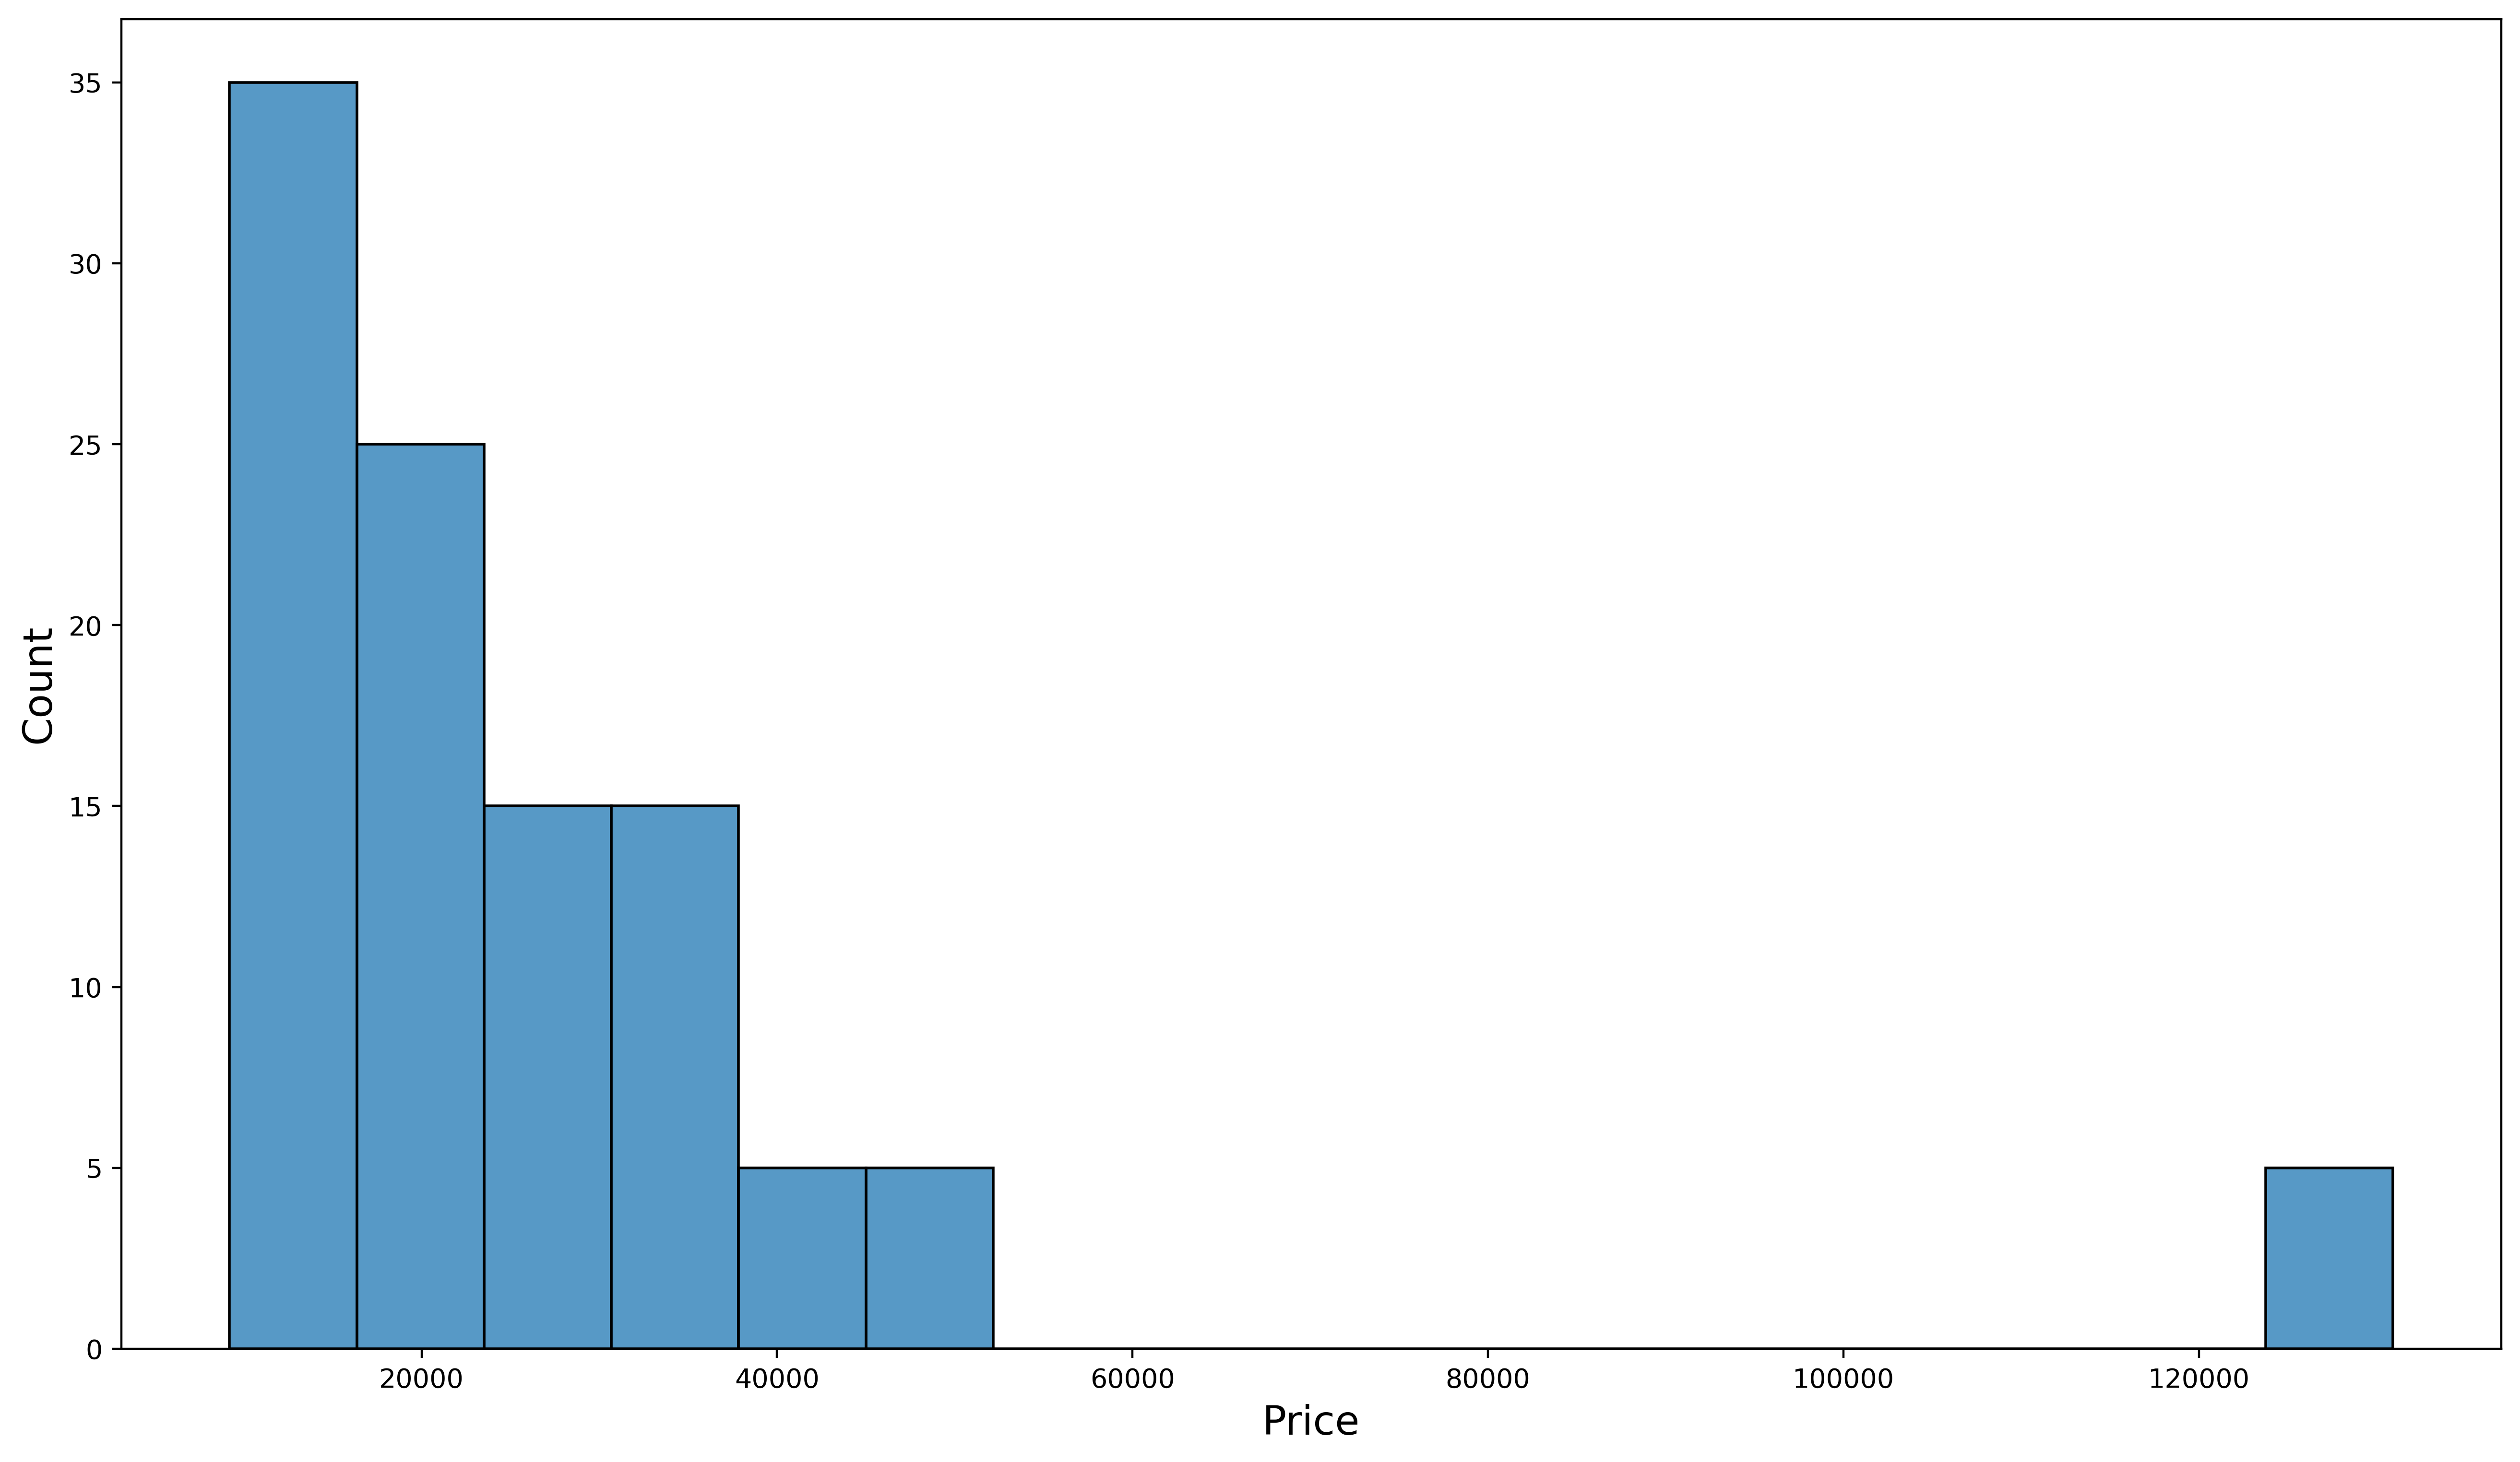

In [65]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 400) # первая переменная - картинка, вторая - оси
ax.set_xlabel("Price", fontsize = 15)
ax.set_ylabel("Count", fontsize = 15)
table_plot = sns.histplot(table['price']) # сохраняем в переменную гистограмму
fig = table_plot.get_figure();
fig.savefig('price_hist.png') # сохраняем картинку с гистограммой

создаем переменные fig и ax (изображение и оси графика).   
указываем размер и разрешение графика. 
задаем подписи осей x и y с помощью методов set_xlabel и set_ylabel.  
fontsize - размер шрифта на графике.
создаем гистограмму с помощью метода histplot библиотеки Seaborn и сохраняем ее в переменную table_plot.  
получаем объект fig из гистограммы и сохраняем его в файл с помощью метода savefig.

По графику видно, что цена за ночь в основном около 10000-20000.

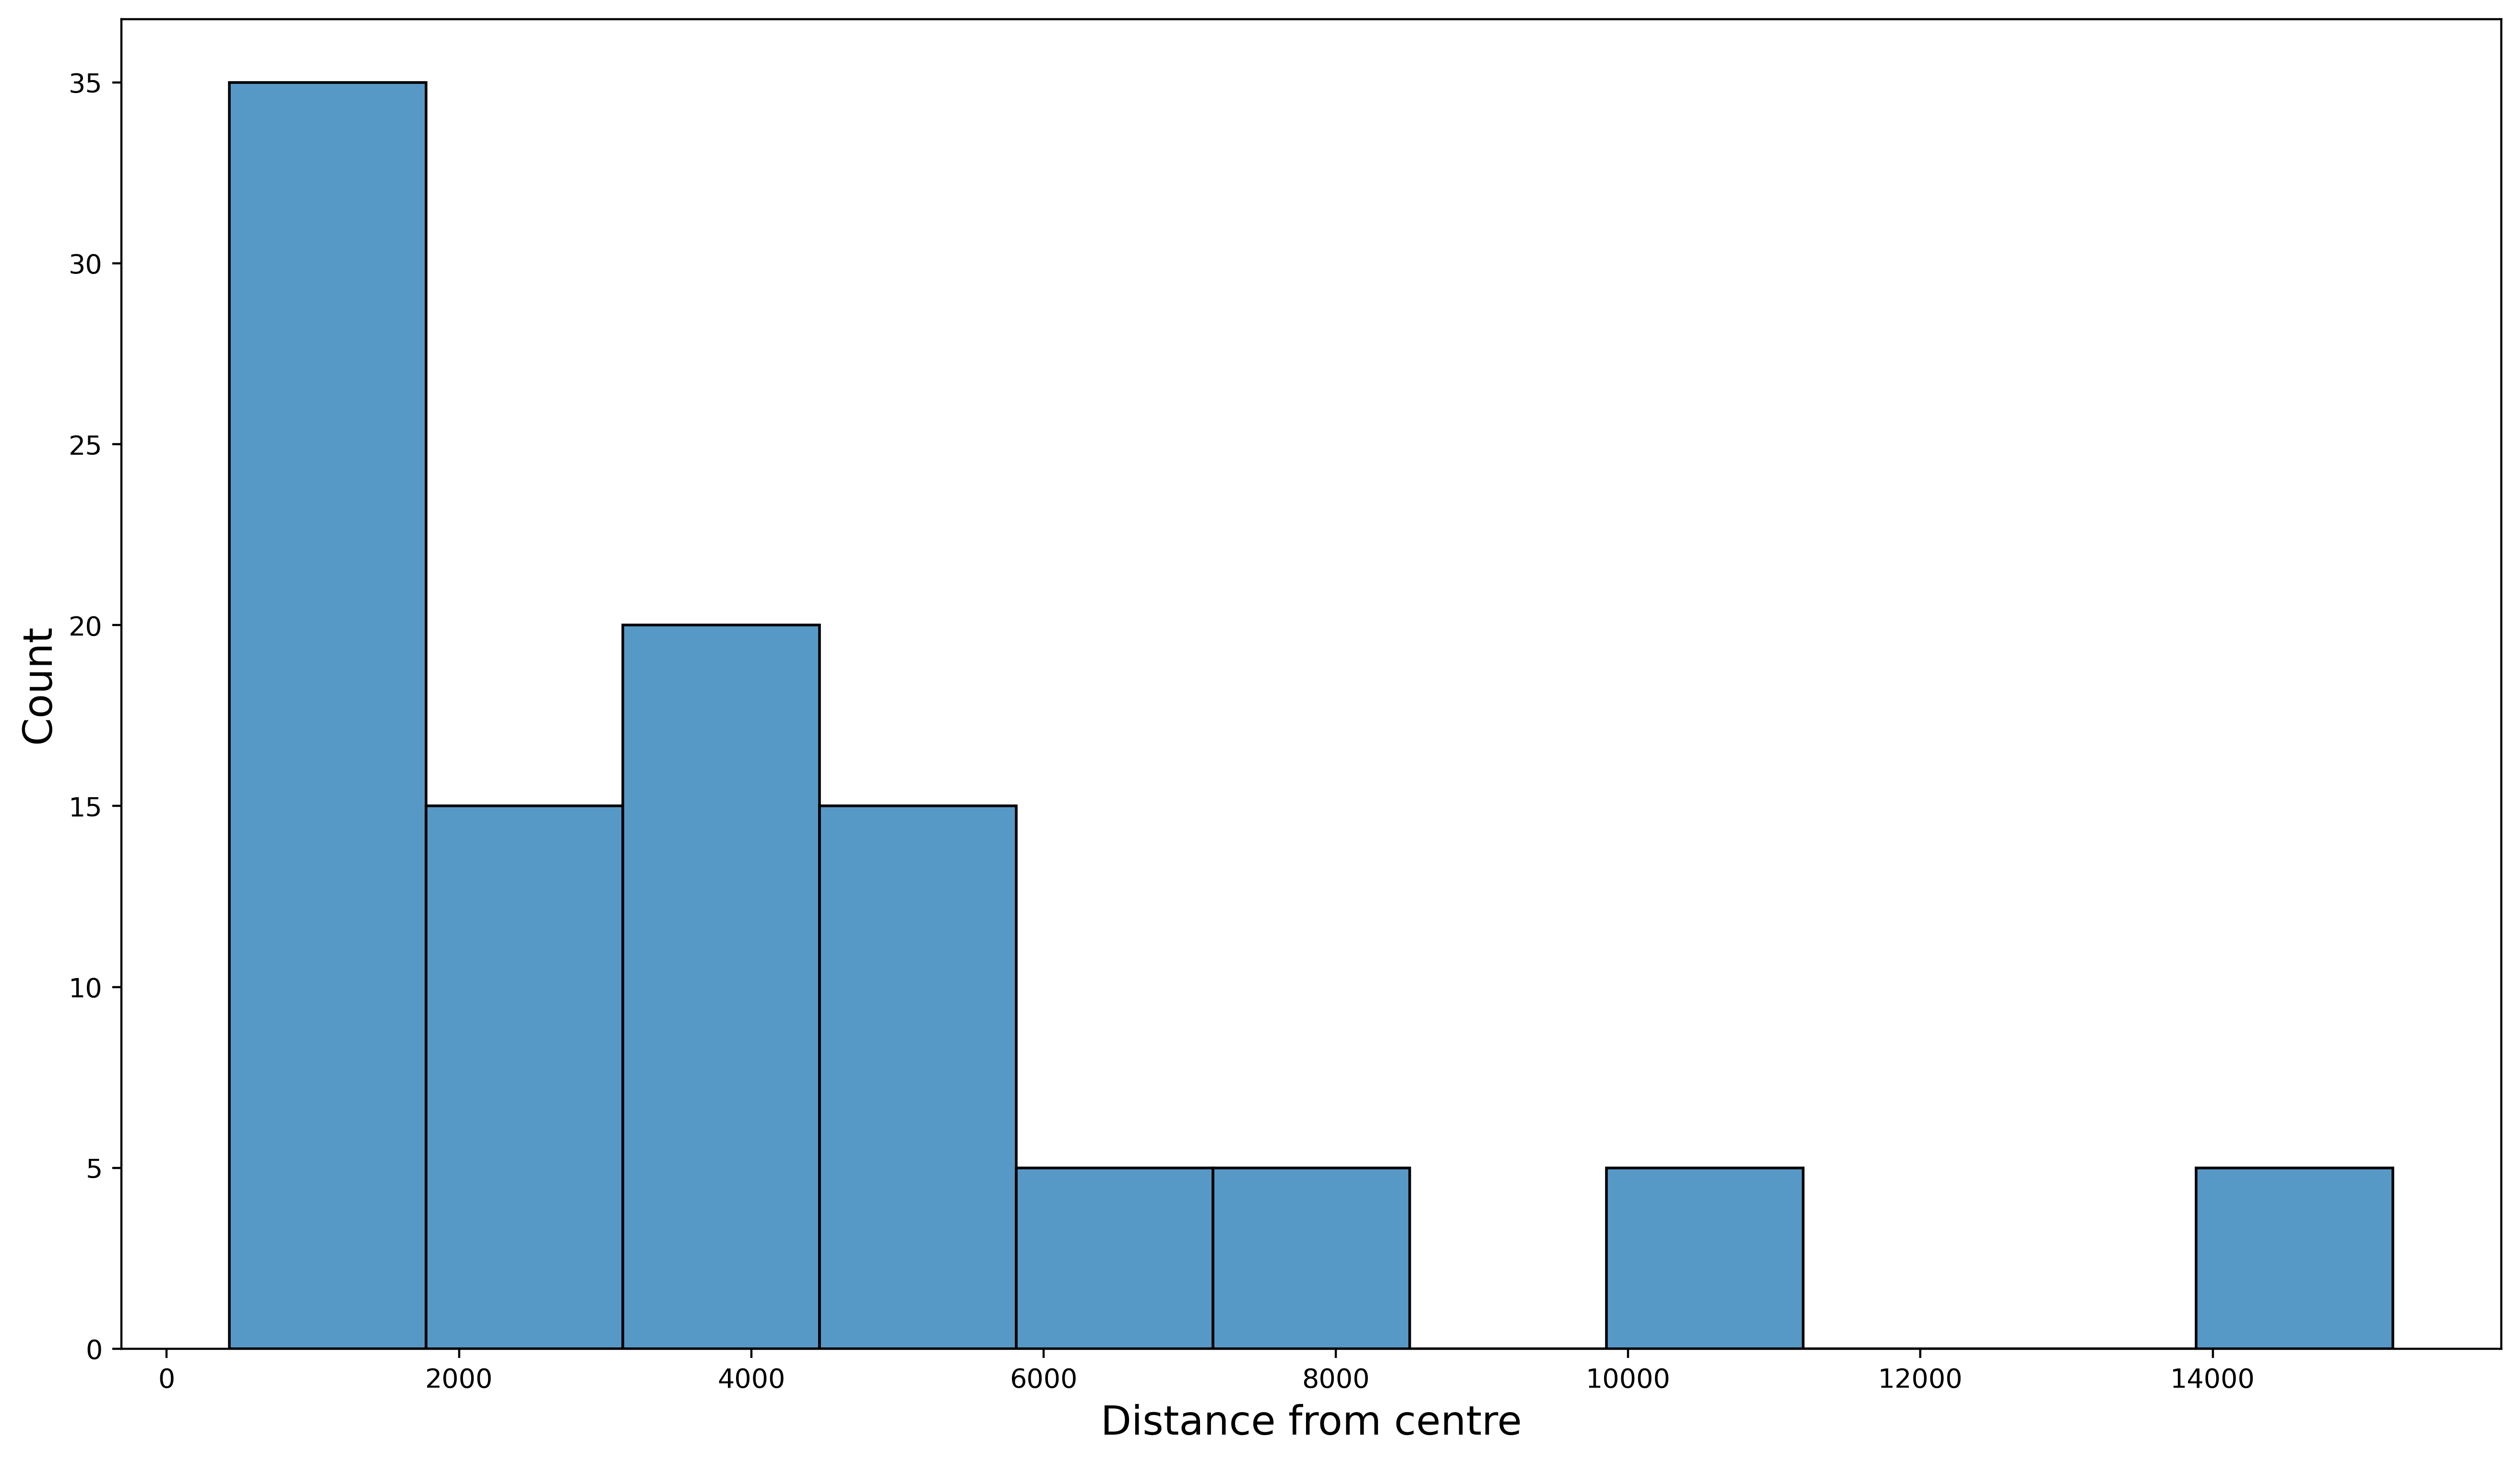

In [66]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 400) # первая переменная - картинка, вторая - оси
ax.set_xlabel("Distance from centre", fontsize = 15)
ax.set_ylabel("Count", fontsize = 15)
table_plot = sns.histplot(table['distance_centre']) # сохраняем в переменную гистограмму
fig = table_plot.get_figure();
fig.savefig('distance_centre_hist.png') # сохраняем картинку с гистограммой

Большая часть отелей находится недалеко от центра, расстояние от центра для большинства отелей составляет примерно от 400 до 5000 метров. 

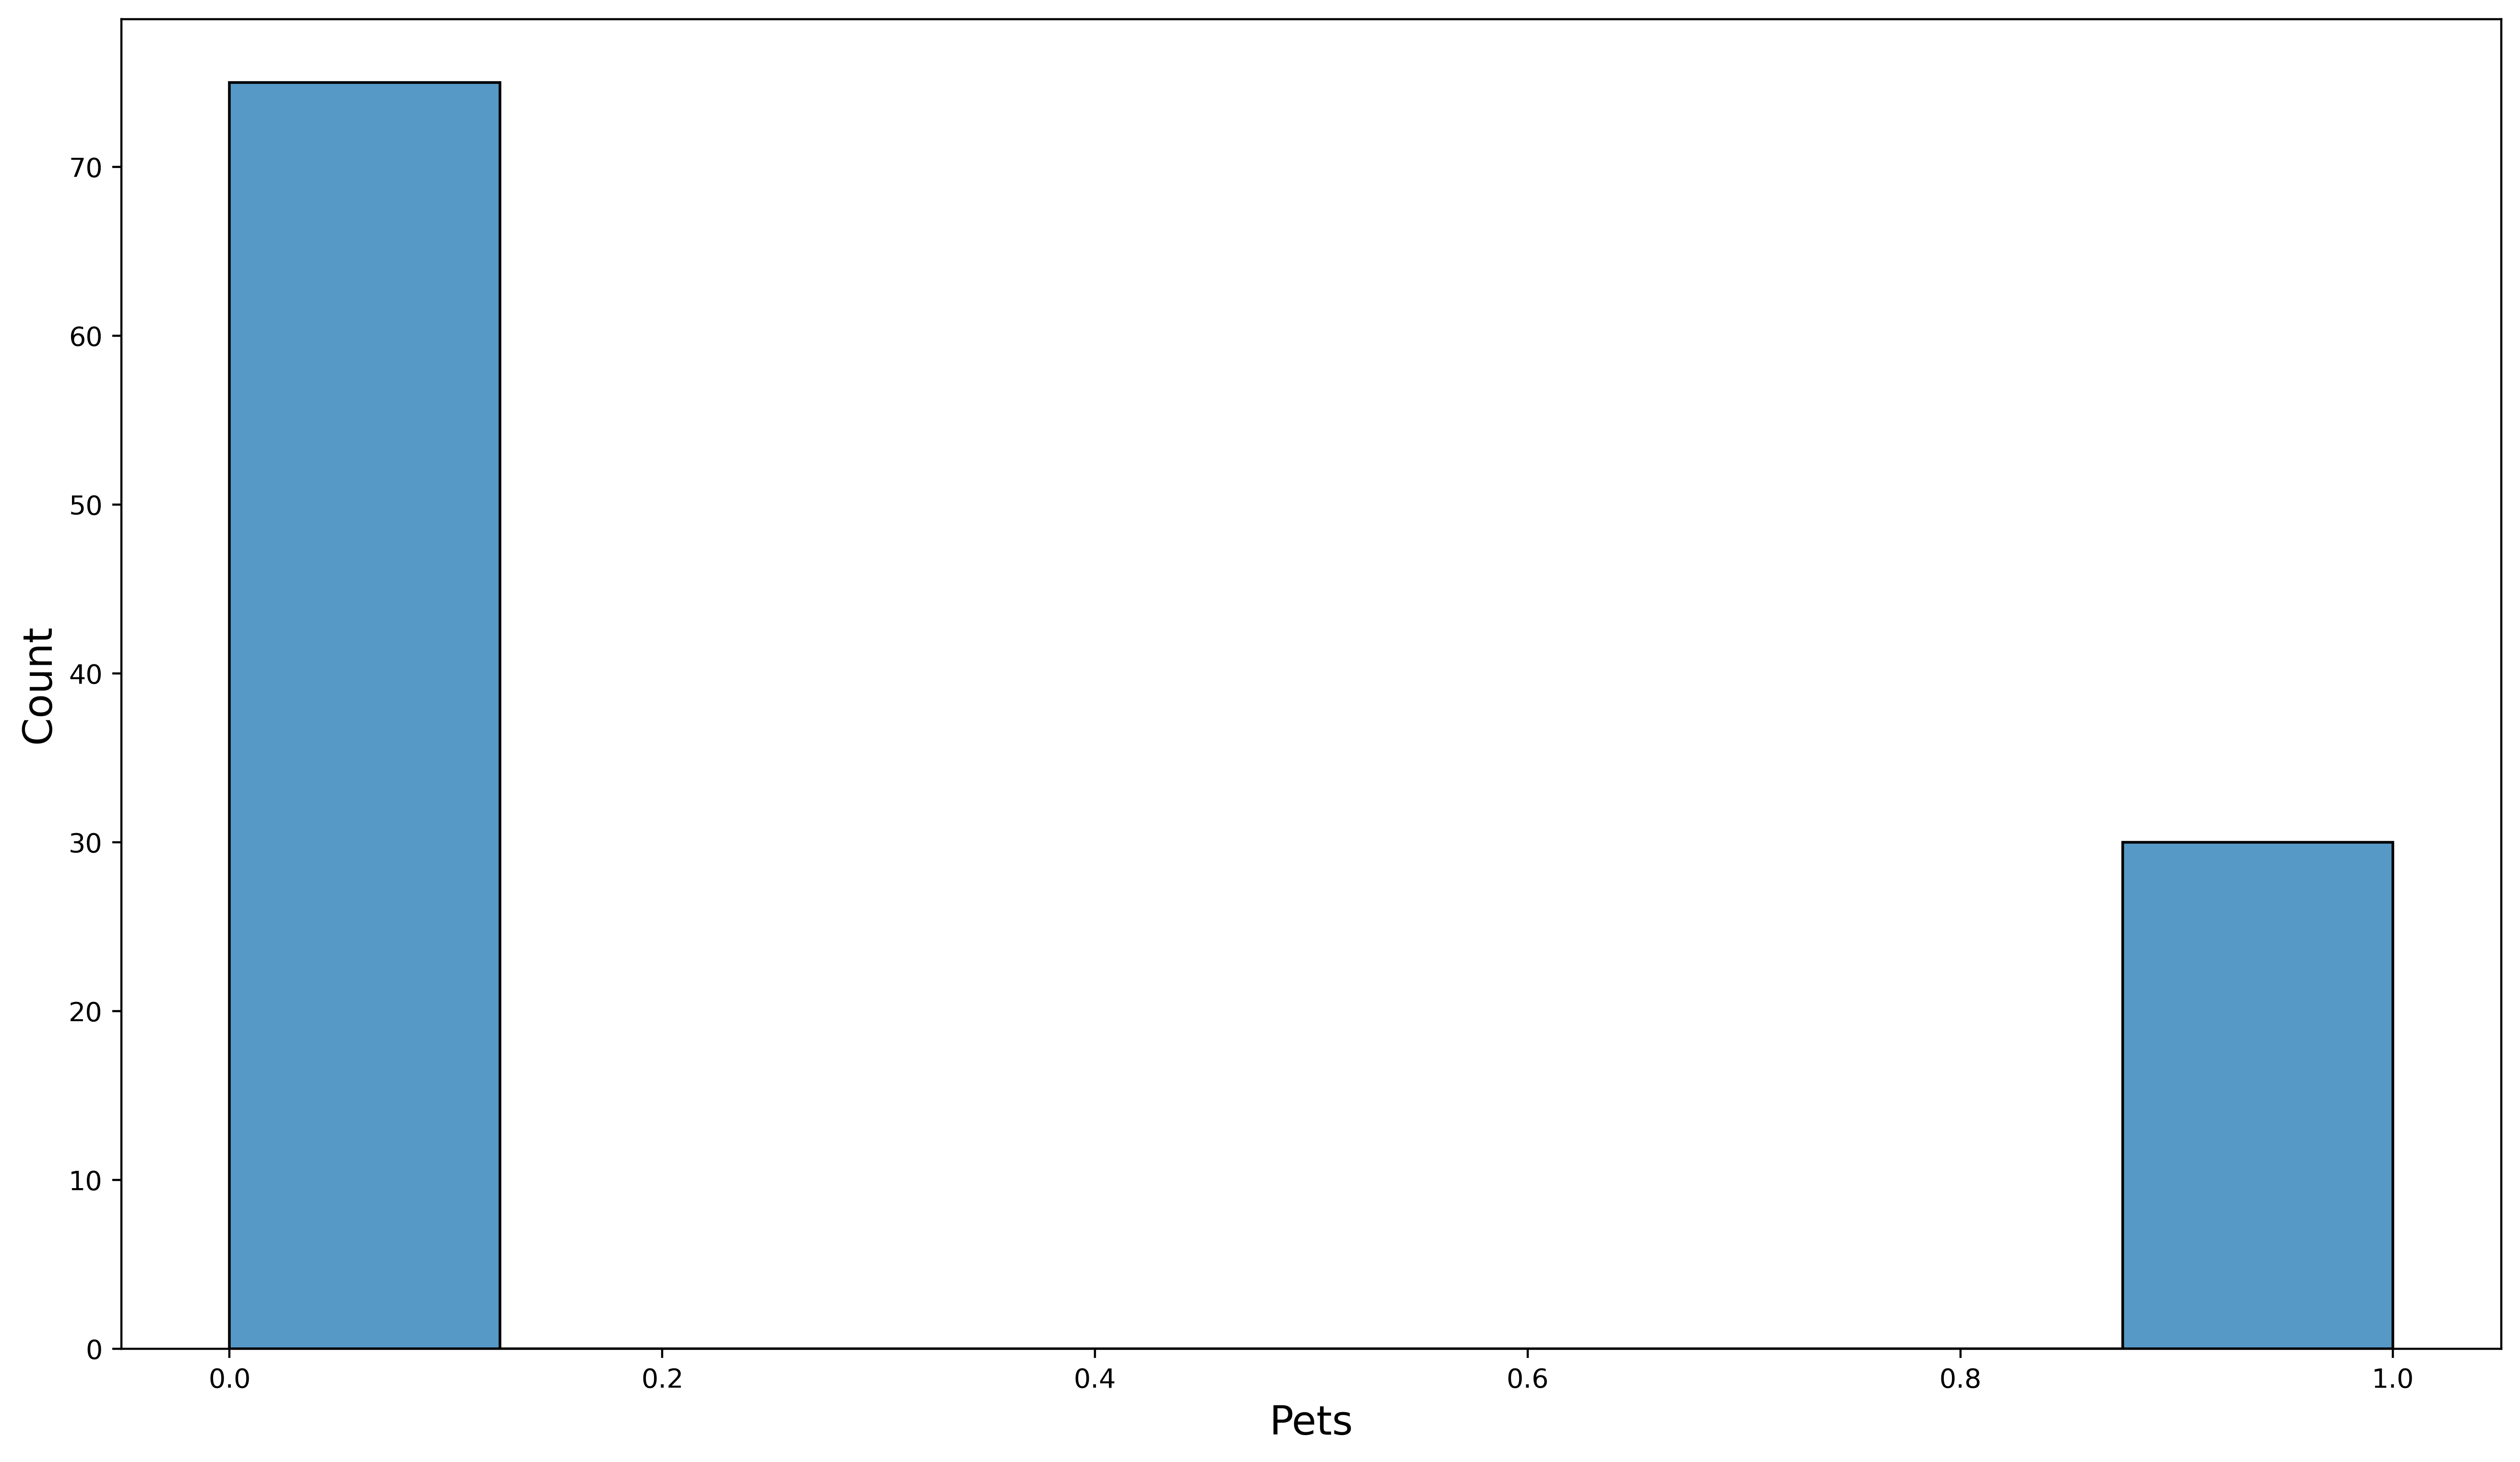

In [44]:
fig, ax = plt.subplots(figsize =(16, 9), dpi = 400) # первая переменная - картинка, вторая - оси
ax.set_xlabel("Pets", fontsize = 15)
ax.set_ylabel("Count", fontsize = 15)
table_plot = sns.histplot(table['pets']) # сохраняем в переменную гистограмму
fig = table_plot.get_figure();
fig.savefig('pets_hist.png') # сохраняем картинку с гистограммой

В более чем 70 отелей с животными нельзя, однако остальные отели разрешают находиться в номерах с животными.

In [ ]:
our_bar = go.Bar(y = table['price'][0:20])
fig = go.Figure(our_bar)
fig.show("notebook")

Можем визуализировать информацию по цене первых 20 отелей следующим образом.

In [ ]:
scatter_trace = go.Scatter(x=table['distance_centre'], y=table['price'], mode='markers', marker=dict(color='purple'))
layout = go.Layout(title="Distance to Centre and Price",
                   xaxis=dict(title="Distance to Centre"),
                   yaxis=dict(title="Price"))
fig = go.Figure(data=[scatter_trace], layout=layout)
fig.show("notebook")

режим графика  "markers" - точки.
Создаем объект слоя графика (layout), задавая заголовок, название осей X и Y.
Создаем объект графика (fig), используя данные из нашего "точечного графика" и объект "layout".
dict используется для создания словаря (dictionary) - структуры данных в Python, чтобы задать marker параметры в виде пары ключ-значение. В данном случае, color является ключом, а 'purple' - соответствующим значением. Такая запись позволяет указывать пары параметров для элементов графика.

Видно, что небольшая связь между показателями есть: чем дороже отель, тем ближе он к центру.

In [ ]:
box_trace = go.Box(x=table['temperature_regulation'], y=table['rating'], marker=dict(color='pink'))
layout = go.Layout(title="Temperature Regulation and Rating",
                   xaxis=dict(title="Temperature Regulation"),
                   yaxis=dict(title="Rating"))
fig = go.Figure(data=[box_trace], layout=layout)
fig.show("notebook")

Таким образом, кондиционер несильно влияет на рейтинг отеля. Единственное, он исключает возможность получить 10 звезд, однако даже при его отсутсвии оценки не падают ниже 7.6, что все еще довольно высокий показатель, а вот обладателем минимальной оценки является как раз-таки отель с кондиционером.

In [ ]:
box_trace = go.Box(x=table['fitness'], y=table['price'], marker=dict(color='green'))
layout = go.Layout(title="Fitness and Price",
                   xaxis=dict(title="Fitness"),
                   yaxis=dict(title="Price"))
fig = go.Figure(data=[box_trace], layout=layout)
fig.show("notebook")

Наблюдаем следующую закономерность: услугу спортивного зала предлагают отели из более дорогой ценовой категории.

In [ ]:
bar_trace = go.Bar(x=['Free Wifi', 'Parking'], 
                    y=[table['free_wifi'].sum(), table['parking'].sum()], 
                    marker=dict(color='teal'))
layout = go.Layout(title="Free Wifi and Parking",
                   yaxis=dict(title="Number of Hotels"))
fig = go.Figure(data=[bar_trace], layout=layout)
fig.show("notebook")

График для наглядности: в 100 отелях есть бесплатный интернет, в 65 есть парковка. Можно отметить, что интернет является практически повсеместным удобством, в отличие от парковки.

In [ ]:
trace = go.Scatter(
    x = table.price,
    y = table.rating,
    mode = 'markers',
    marker = {
        'size': 10,
        'color': 'brown',
        'opacity': 0.5,
    },
    text = table.title,
    hovertemplate =
    '<b>%{text}</b>' +
    'Price: %{x}' +
    'Rating: %{y}'
)
our_layout = go.Layout(
    title = 'Hotels',
    xaxis = {'title': 'Price'},
    yaxis = {'title': 'Rating'})

fig = go.Figure([trace], layout = our_layout)
fig.show("notebook")

opacity - прозрачность маркеров на графике. При наведении на точку с заголовком появляется всплывающее окно hovertemplate, которое содержит информацию о цене и рейтинге отеля.

Еще один график по рейтингу и цене. Принимая во внимание выбросы, можно заметить некую линейную зависимость в левом верхнем углу: с ростом цены за номер чаще всего возрастает рейтинг. Удивительно, что самый дорогой отель имеет отметку далеко не 10, не 9, а всего 8 баллов (для такой суммы). Отель с самой низкой оценкой также имеет цену выше среднего. Это можно попытаться объяснить либо привередливыми богатыми клиентами (что лишний раз убеждает в сложности работы с такой группой людей), либо же дело в большой разнице цены/ качества.

Дальше мы решили проанализировать, от чего больше всего зависит количество звезд у отеля. Мы построили графики по всем переменным, продемонстрируем лишь наиболее важные и интересные.

In [ ]:
box_trace = go.Box(x=table['star_rating'], y=table['distance_centre'], marker=dict(color='maroon'))
layout = go.Layout(title="The dependence of the star rating on the distance to the centre",
                   xaxis=dict(title="Star Rating"),
                   yaxis=dict(title="Distance to Centre"))
fig = go.Figure(data=[box_trace], layout=layout)
fig.show("notebook")

Данный график показывает, как меняется распределение рейтинга отеля (звезд) в зависимости от расстояния до центра города. Он может быть полезен, например, для определения того, какие отели в какой зоне города чаще всего получают высокие рейтинги. Мы видим выбросы: есть отель, который имеет три звезды и при этом находится очень далеко от центра. Для четырехзвездочных отелей тоже есть выброс: один отель находится дальше от центра, чем остальные четырехзвездочные отели. Для всех звезд мы видим медиану: например, для четырехзвездочных и пятизвездочных отелей медиана примерно одинаковая (то есть расстояние до центра, которое половина отелей превышает и половина имеет меньшее, примерно одно и то же).

In [ ]:
trace = go.Scatter(
    x = table.star_rating,
    y = table.price,
    mode = 'markers',
    marker = {
        'size': 10,
        'color': 'maroon',
        'opacity': 0.5,
    },
    text = table.title,
    hovertemplate =
    '<b>%{text}</b>' +
    'Price: %{x}' +
    'Rating: %{y}'
)
our_layout = go.Layout(
    title = 'The dependence of the star rating on the price',
    xaxis = {'title': 'Star Rating'},
    yaxis = {'title': 'Price'})

fig = go.Figure([trace], layout = our_layout)
fig.show("notebook")

График зависимости количества звезд от цены отеля. Здесь мы видим, что 5 звезд имеют всего 3 отеля, при этом из абсолютно разных ценовых категорий. Наибольшее количество отелей имеют 4 звезды, более дешевые отели оценены в 3 звезды, и всего один отель имеет 2.

In [ ]:
trace = go.Scatter(
    x = table.star_rating,
    y = table.rating,
    mode = 'markers',
    marker = {
        'size': 10,
        'color': 'maroon',
        'opacity': 0.5,
    },
    text = table.title,
    hovertemplate =
    '<b>%{text}</b>' +
    'Price: %{x}' +
    'Rating: %{y}'
)
our_layout = go.Layout(
    title = 'The dependence of the star rating on the rating',
    xaxis = {'title': 'Star Rating'},
    yaxis = {'title': 'Rating'})

fig = go.Figure([trace], layout = our_layout)
fig.show("notebook")

График зависимости количества звезд от обычного рейтинга на сайте. Мы видим, что самый высокий рейтинг на сайте имеют трехзвездочные и четырехзвездочные отели. В целом, данные отели имеют довольно высокий рейтинг на сайте, чего не скажешь о тех немногочисленных пятизвездочных отелях, один из которых имеет самый низкий рейтинг на сайте. Возможно, большое количество звезд - не всегда показатель хорошего отеля:)